<h1>Notebook - do seminário final Ciência de dados</h1>
<h2><b>Tema:</b> Análise de churn (cancelamento de clientes)</h2>

In [9]:
#import das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,roc_curve,auc,RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Carregando a base de dados
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Verificando a distribuição dos cancelamentos 
# yes -> cliente cancelou o serviço no ultimo mês
# no -> cliente não cancelou no ultimo mês

distribuicaoAlvo = df['Churn'].value_counts(normalize=True)
distribuicaoAlvo

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [12]:
#combinações de diferentes variáveis (serviço e cancelamento)
#PhoneService x Churn

dfPhone = df[['PhoneService','Churn']].value_counts(normalize=True)
tablePhone = dfPhone.reset_index()
tablePhone.columns = ['PhoneService','Cancelamento','proporção']
tablePhone = tablePhone.sort_values(by='proporção',ascending=False)
tablePhone

,PhoneService,Cancelamento,proporção
0,Yes,No,0.661934
1,Yes,Yes,0.241232
2,No,No,0.072696
3,No,Yes,0.024137


<Figure size 800x600 with 0 Axes>

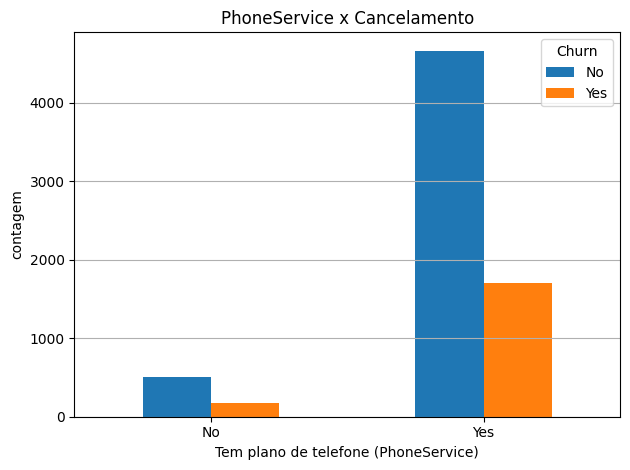

In [13]:
#Gráfico
table = pd.crosstab(df['Churn'],df['PhoneService'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("PhoneService x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Tem plano de telefone (PhoneService)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [14]:
#MultipleLines x Churn

dfMultiple = df[['MultipleLines','Churn']].value_counts(normalize=True)
tableMultiple = dfMultiple.reset_index()
tableMultiple.columns = ['MultipleLines','Cancelamento','proporção']
tableMultiple = tableMultiple.sort_values(by='proporção',ascending=False)
tableMultiple

,MultipleLines,Cancelamento,proporção
0,No,No,0.360784
1,Yes,No,0.301150
2,Yes,Yes,0.120687
3,No,Yes,0.120545
4,No phone service,No,0.072696
5,No phone service,Yes,0.024137


<Figure size 800x600 with 0 Axes>

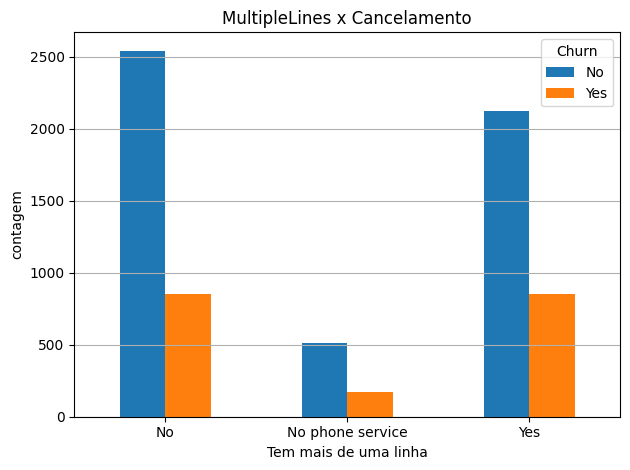

In [15]:
#Gráfico
table = pd.crosstab(df['Churn'],df['MultipleLines'])

plt.figure(figsize=(8, 6))
table.T.plot(kind='bar')
plt.title("MultipleLines x Cancelamento")
plt.ylabel("contagem")
plt.xlabel("Tem mais de uma linha")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()